In [2]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/


# -----------------------------------------------------------------------------------------------
# Author: Bùi Tiến Thành - Tien-Thanh Bui (@bu1th4nh)
# Title: playground_data.ipynb
# Date: 2024/11/07 14:39:32
# Description: 
# 
# (c) 2024 bu1th4nh. All rights reserved. 
# Written with dedication in the University of Central Florida, EPCOT and the Magic Kingdom.
# -----------------------------------------------------------------------------------------------

from s3fs import S3FileSystem
import numpy as np
import pandas as pd 
import sys

from matplotlib.colors import LinearSegmentedColormap
sys.path.append('../../')

import seaborn as sns
import matplotlib.pyplot as plt

import random

from tqdm import tqdm
from downstream.survival import surv_analysis

plt.rcParams['font.family'] = 'Arial'

key = 'bu1th4nh'
secret = 'ariel.anna.elsa'
endpoint_url = 'http://localhost:9000'

s3 = S3FileSystem(
    anon=False, 
    endpoint_url=endpoint_url,
    key=key,
    secret=secret,
    use_ssl=False
)
storage_options = {
    'key': key,
    'secret': secret,
    'endpoint_url': endpoint_url,
}

storage_option = storage_options
DATA_PATH = 's3://datasets/LungCancer/processed_3_omics_mRNA_miRNA_methDNA'
SURV_PATH = 's3://datasets/LungCancer/survivalanalysis_testdata_3_omics_mRNA_miRNA_methDNA'
# DATA_PATH = 's3://datasets/LungCancer/processed_2_omics_mRNA_miRNA'
# SURV_PATH = 's3://datasets/LungCancer/survivalanalysis_testdata_2_omics_mRNA_miRNA'

methDNA_all = pd.read_parquet(f'{DATA_PATH}/methDNA.parquet', storage_options=storage_option)
miRNA_all = pd.read_parquet(f'{DATA_PATH}/miRNA.parquet', storage_options=storage_option)
mRNA_all = pd.read_parquet(f'{DATA_PATH}/mRNA.parquet', storage_options=storage_option)
bipartite_all = pd.read_parquet(f'{DATA_PATH}/bipart.parquet', storage_options=storage_option)

def select_top_features_by_variance(df, top_n=1000):
    variances = df.var(axis=1)
    top_features = variances.nlargest(top_n).index
    return df.loc[top_features]

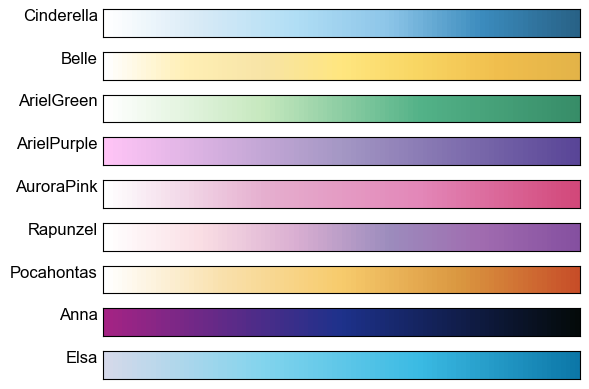

In [3]:

CinderellaCMAPBaseColor = ['#ffffff', '#d7eaf6','#b1def5','#8cc5e8','#3b8bbd','#286287']
BelleCMAPBaseColor = ['#ffffff', '#ffefb5','#f7e4a6','#ffe67f','#f8d562','#f0be4d','#e3b348',]
ArielGreenCMAPBaseColor = ['#ffffff', '#c6e8be', '#53b288', '#378d68']
ArielPurpleCMAPBaseColor = ['#ffc4f6', '#a497c4', '#594597']
AuroraPinkCMAPBaseColor = ['#ffffff', '#e5afcf', '#e387b8', '#d2487a']
RapunzelCMAPBaseColor = ['#ffffff', '#fadee4', '#daafd2', '#9c8cbd', '#a06baf', '#8550a0']
PocahontasCMAPBaseColor = ['#ffffff', '#f9e0ab', '#f7cb6c', '#da9740', '#c74e28']
AnnaCMAPBaseColor = ['#a42384', '#1d318b', '#040a0a']
ElsaCMAPBaseColor = ['#d5d9ea', '#82d4ed', '#3abae3', '#0c77a8']



def create_custom_colormap(base_colors):
    return LinearSegmentedColormap.from_list('custom_cmap', base_colors)

CinderellaCMAP = create_custom_colormap(CinderellaCMAPBaseColor)
BelleCMAP = create_custom_colormap(BelleCMAPBaseColor)
ArielGreenCMAP = create_custom_colormap(ArielGreenCMAPBaseColor)
ArielPurpleCMAP = create_custom_colormap(ArielPurpleCMAPBaseColor)
AuroraPinkCMAP = create_custom_colormap(AuroraPinkCMAPBaseColor)
RapunzelCMAP = create_custom_colormap(RapunzelCMAPBaseColor)
PocahontasCMAP = create_custom_colormap(PocahontasCMAPBaseColor)
AnnaCMAP = create_custom_colormap(AnnaCMAPBaseColor)
ElsaCMAP = create_custom_colormap(ElsaCMAPBaseColor)


# Create a matrix to display all colormaps
color_matrix = np.linspace(0, 1, 100).reshape(1, -1)
fig, axs = plt.subplots(9, 1, figsize=(6, 4))

# Display all colormaps
for idx, cmap in enumerate([CinderellaCMAP, BelleCMAP, ArielGreenCMAP, ArielPurpleCMAP, AuroraPinkCMAP, RapunzelCMAP, PocahontasCMAP, AnnaCMAP, ElsaCMAP]):
    sns.heatmap(color_matrix, cmap=cmap, cbar=False, ax=axs[idx])
    axs[idx].set_ylabel(['Cinderella', 'Belle', 'ArielGreen', 'ArielPurple', 'AuroraPink', 'Rapunzel', 'Pocahontas', 'Anna', 'Elsa'][idx], size=12)
    axs[idx].yaxis.label.set(rotation='horizontal', ha='right');

    axs[idx].set_xticks([])
    axs[idx].set_yticks([])
    axs[idx].set_frame_on(True)
    for _, spine in axs[idx].spines.items():
        spine.set_visible(True)



plt.tight_layout()
plt.show()

In [4]:
FEATURE_SIZE = 5
SAMPLES_SIZE = 8

samples = random.sample(miRNA_all.columns.to_list(), SAMPLES_SIZE)

miRNA = miRNA_all.loc[random.sample(miRNA_all.index.tolist(), FEATURE_SIZE), samples]
mRNA = mRNA_all.loc[random.sample(mRNA_all.index.tolist(), FEATURE_SIZE), samples]
methDNA = methDNA_all.loc[random.sample(methDNA_all.index.tolist(), FEATURE_SIZE), samples]
bipart = bipartite_all.loc[mRNA.index, miRNA.index]

### Corr colormap

In [116]:
Jasmine = np.random.rand(3, 8)
master_clr = CinderellaCMAP

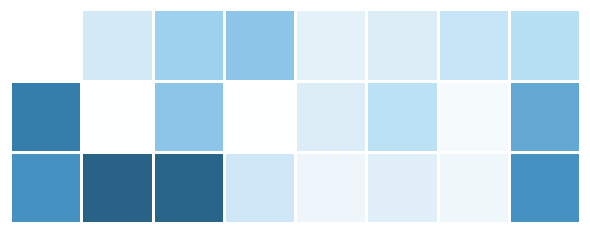

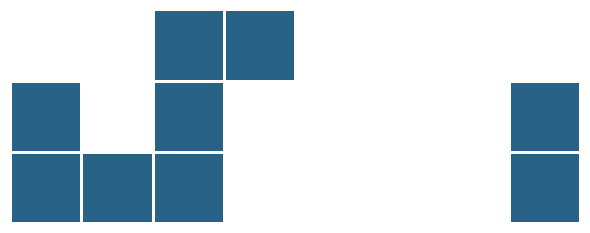

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(6, 16))
sns.heatmap(Jasmine, cmap=master_clr, ax=ax, annot=False, square=True, linewidths=1, cbar=False)
ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False    # labels along the left edge are off
)

fig.tight_layout()
fig.show()
fig, ax = plt.subplots(1, 1, figsize=(6, 16))
sns.heatmap(Jasmine > 0.5, cmap=master_clr, ax=ax, annot=False, square=True, linewidths=1, cbar=False)
ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False    # labels along the left edge are off
)

fig.tight_layout()
fig.show()

### Data colormap

In [118]:
Jasmine = np.random.randint(2, size=(5, 5))
master_clr = ArielPurpleCMAP

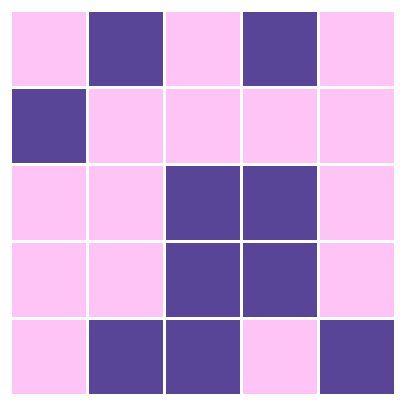

In [119]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.heatmap(Jasmine.T, cmap=master_clr, ax=ax, annot=False, square=True, linewidths=1, cbar=False)
ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelbottom=False, # labels along the bottom edge are off
    labelleft=False    # labels along the left edge are off
)

### 1-0 colormap

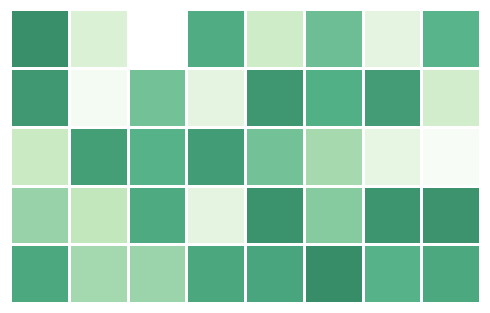

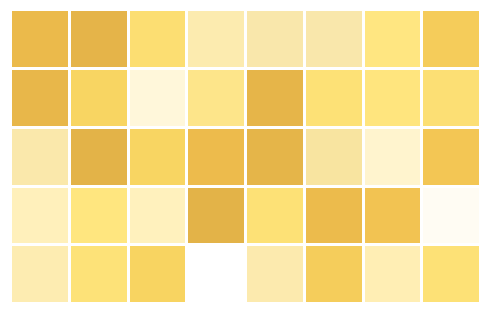

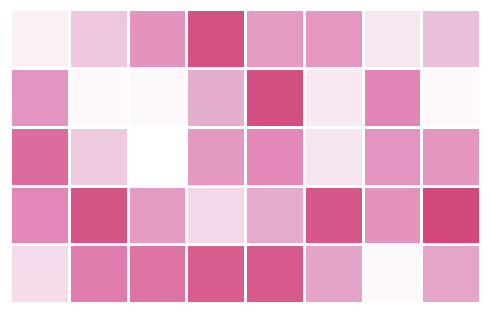

In [120]:
for (data, color) in [(np.random.rand(FEATURE_SIZE, SAMPLES_SIZE), ArielGreenCMAP), (np.random.rand(FEATURE_SIZE, SAMPLES_SIZE), BelleCMAP), (np.random.rand(FEATURE_SIZE, SAMPLES_SIZE), AuroraPinkCMAP)]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.heatmap(data, cmap=color, ax=ax, annot=False, square=True, linewidths=1, cbar=False)
    ax.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False    # labels along the left edge are off
    )

    fig.tight_layout()
    fig.show()

    



# Legacy code


In [121]:
# fig, ax = plt.subplots(4, 1, figsize=(5, 15))
# xlabel = 'Samples'
# ylabel = ['mRNA expression', 'miRNA expression', 'DNA methylation', 'Other omics']

# sns.heatmap(mRNA.values, cmap=ArielGreenCMAP, ax=ax[0], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(miRNA.values, cmap=BelleCMAP, ax=ax[1], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(methDNA.values, cmap=AuroraPinkCMAP, ax=ax[2], annot=False, square=True, linewidths=1, cbar=False)
# # sns.heatmap(np.zeros((FEATURE_SIZE, SAMPLES_SIZE)), cmap=RapunzelCMAP, ax=ax[3], annot=False, square=True, linewidths=1, cbar=False)
# ax[3].text(0.5, 0.5, '...', fontsize=16, ha='center', va='center', color='black')
# ax[3].set_frame_on(False)

# for idx, axx in enumerate(ax):
#     axx.tick_params(
#         axis='both',       # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,        # ticks along the left edge are off
#         right=False,       # ticks along the right edge are off
#         labelbottom=False, # labels along the bottom edge are off
#         labelleft=False    # labels along the left edge are off
#     )
#     axx.set_xlabel(xlabel, size=16)
#     axx.set_ylabel(ylabel[idx], size=16)

# # fig.subplots_adjust(hspace=-0.625) 
# fig.suptitle('Multi-omics Data', size=20)
# fig.tight_layout()
# fig.show()




In [122]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# xlabel = 'Samples'
# ylabel = ['mRNA expression', 'miRNA expression', 'DNA methylation']

# mRNAmiRNA = np.random.randint(2, size=(FEATURE_SIZE, FEATURE_SIZE))
# sns.heatmap(mRNAmiRNA, cmap=ArielPurpleCMAP, ax=ax, annot=False, square=True, linewidths=1, cbar=False)

# ax.tick_params(
#     axis='both',       # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     left=False,        # ticks along the left edge are off
#     right=False,       # ticks along the right edge are off
#     labelbottom=False, # labels along the bottom edge are off
#     labelleft=False    # labels along the left edge are off
# )
# ax.set_xlabel('miRNA expression', size=16)
# ax.set_ylabel('mRNA expression', size=16)

# # fig.subplots_adjust(hspace=-0.625) 
# fig.suptitle('Interaction Network', size=20)
# fig.tight_layout()
# fig.show()

In [123]:
# mRNAcorr = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)
# miRAcorr = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)
# methDNAcorr = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)
# mRNAmethDNA = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)
# miRNAmethDNA = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)
# methDNAmiRNA = np.random.rand(FEATURE_SIZE, FEATURE_SIZE)

In [124]:
# fig, ax = plt.subplots(4, 4, figsize=(8, 8))
# xlabels = ['mRNA expression', 'miRNA expression', '...', 'DNA methylation']
# ylabels = ['mRNA expression', 'miRNA expression', '...', 'DNA methylation']


# sns.heatmap(mRNAcorr, cmap=ArielGreenCMAP, ax=ax[0][0], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(miRAcorr, cmap=BelleCMAP,      ax=ax[1][1], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(methDNAcorr, cmap=AuroraPinkCMAP, ax=ax[3][3], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(mRNAmethDNA, cmap=CinderellaCMAP, ax=ax[0][3], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(mRNAmethDNA.T, cmap=CinderellaCMAP, ax=ax[3][0], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(miRNAmethDNA, cmap=RapunzelCMAP, ax=ax[1][3], annot=False, square=True, linewidths=1, cbar=False)
# sns.heatmap(methDNAmiRNA, cmap=RapunzelCMAP, ax=ax[3][1], annot=False, square=True, linewidths=1, cbar=False)


# for i in range(4):
#     ax[i][2].text(0.5, 0.5, '...', fontsize=18, ha='center', va='center')
#     ax[2][i].text(0.5, 0.5, '...', fontsize=18, ha='center', va='center')
#     ax[i][2].set_frame_on(False)
#     ax[2][i].set_frame_on(False)
# ax[0][1].text(0.5, 0.5, 'Not\ncalculated', fontsize=18, ha='center', va='center')
# ax[1][0].text(0.5, 0.5, 'Not\ncalculated', fontsize=18, ha='center', va='center')
# ax[0][1].set_frame_on(False)
# ax[1][0].set_frame_on(False)

# # sns.heatmap(mRNAmiRNA, cmap=ArielPurpleCMAP, ax=ax[0][1], annot=False, square=True, linewidths=1, cbar=False)
# # sns.heatmap(mRNAmiRNA.T, cmap=ArielPurpleCMAP, ax=ax[1][0], annot=False, square=True, linewidths=1, cbar=False)


# for idx, axxx in enumerate(ax):
#     for jdx, axx in enumerate(axxx):
#         axx.tick_params(
#             axis='both',       # changes apply to the x-axis
#             which='both',      # both major and minor ticks are affected
#             bottom=False,      # ticks along the bottom edge are off
#             top=False,         # ticks along the top edge are off
#             left=False,        # ticks along the left edge are off
#             right=False,       # ticks along the right edge are off
#             labelbottom=False, # labels along the bottom edge are off
#             labelleft=False,   # labels along the left edge are off
#             labelsize=0
#         )
#         axx.xaxis.set_label_position('top')  
#     ax[idx][0].set_ylabel(xlabels[idx], size=11)
#     ax[0][idx].set_xlabel(ylabels[idx], size=11)
        

# # fig.subplots_adjust(hspace=-0.625) 
# fig.suptitle('Raw Interaction Weight', size=20)
# fig.tight_layout()
# fig.show()

